In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams["figure.dpi"] = (100)

from math import *
import scipy.constants
import copy
from opc import *

In [2]:
f = 1.0e12
λ = scipy.constants.c/f
k = 2*pi*λ
zR = 1.0
w0 = sqrt(zR*λ/pi)
print(w0)

0.009768669468496662


In [3]:
help(SingleComponentBeam.GaussianBeamWaist)

Help on method GaussianBeamWaist in module opc:

GaussianBeamWaist(f, nx, ny, dx, dy, w0x, w0y) method of builtins.type instance
    Create a gaussian beam with width parameters w0x/w0y
    in horizontal/vertical direction.



λ = 0.299792 mm
k = 20958.450220 m⁻¹
1.0000000000000002
(0.009768669468371866, 0.009768669468376989)
(0.009768669468496662, 0.00976866946840171)


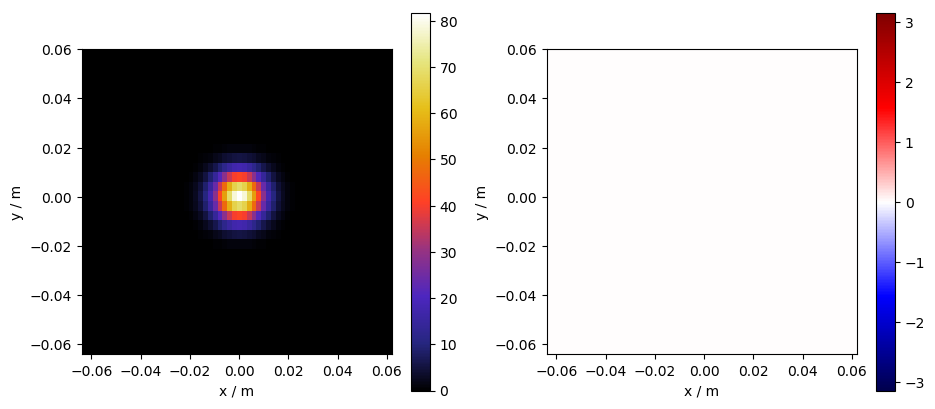

In [3]:
gbw = SingleComponentBeam.GaussianBeamWaist(f, 64, 32, 0.002, 0.004, w0, w0)
print(gbw.TotalPower())
print(gbw.FitSizeW(order=4, threshold=-3))
print(gbw.RMS_SizeW())
gbw.plot()
plt.show()

In [5]:
help(SingleComponentBeam.GaussianBeam)

Help on method GaussianBeam in module opc:

GaussianBeam(f, nx, ny, dx, dy, zR, z) method of builtins.type instance
    Create a gaussian beam with a Rayleigh range zR
    at a distance z from the waist (both polarization directions are equal).
    z cannot be exactly zero.



λ = 0.299792 mm
k = 20958.450220 m⁻¹
w0 = 9.768669 mm
w = 13.814985 mm
R = 2.000000 m
1.0


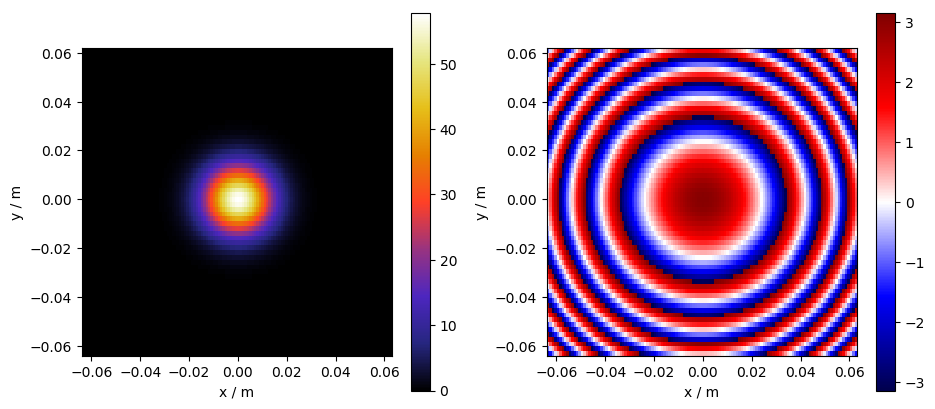

In [4]:
gb = SingleComponentBeam.GaussianBeam(f, 128, 64, 0.001, 0.002, zR, 1.0)
print(gb.TotalPower())
gb.plot()
plt.show()

In [4]:
gbt = SingleComponentBeam(f, 64, 32, 0.002, 0.004)
HuygensFresnel(gbw,gbt,1.0)

1.123064236390093
(64, 32)
(0.014803096122055001, 0.018846831484656833)
(0.013814984848687952, 0.04222603923315573)


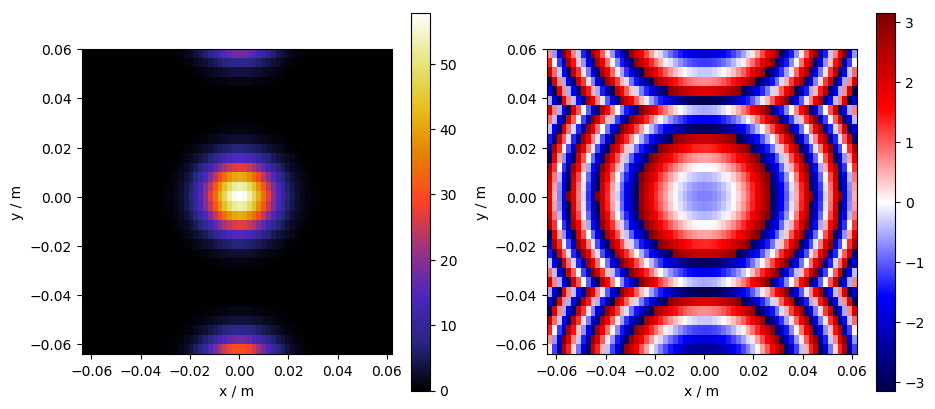

In [5]:
print(gbt.TotalPower())
print(gbt.shape())
print(gbt.FitSizeW(order=4, threshold=-3))
print(gbt.RMS_SizeW())
gbt.plot()
plt.show()

0.9999958970169835
(64, 32)
(0.013814984554427152, 0.013814972078795097)
(0.013814984848687952, 0.013814363283467933)


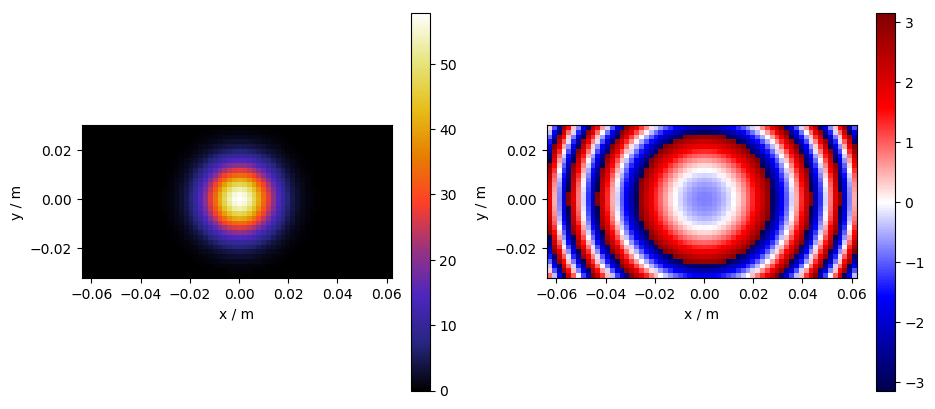

In [7]:
gbt = SingleComponentBeam(f, 64, 32, 0.002, 0.002)
HuygensFresnel(gbw,gbt,1.0)
print(gbt.TotalPower())
print(gbt.shape())
print(gbt.FitSizeW(order=4, threshold=-3))
print(gbt.RMS_SizeW())
gbt.plot()
plt.show()

1.0000000000000002
(64, 32)
(0.013814984806774308, 0.013814984151198148)
(0.013814984848687952, 0.01381498484869729)


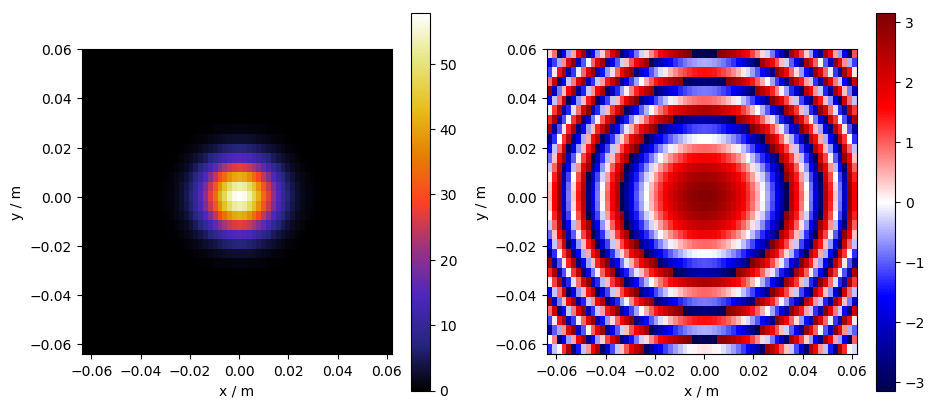

In [5]:
propagated = gbw.NearFieldProp(1.0)
print(propagated.TotalPower())
print(propagated.shape())
print(propagated.FitSizeW(order=4, threshold=-3))
print(propagated.RMS_SizeW())
propagated.plot()
plt.show()

dx : 0.002 => 0.002
dy : 0.004 => 0.002
0.0023421285781250003 0.0023421285781250003
(64, 32)
1
(0.013814985133865195, 0.013814982680661734)
(0.013814984848687954, 0.013814986160574997)


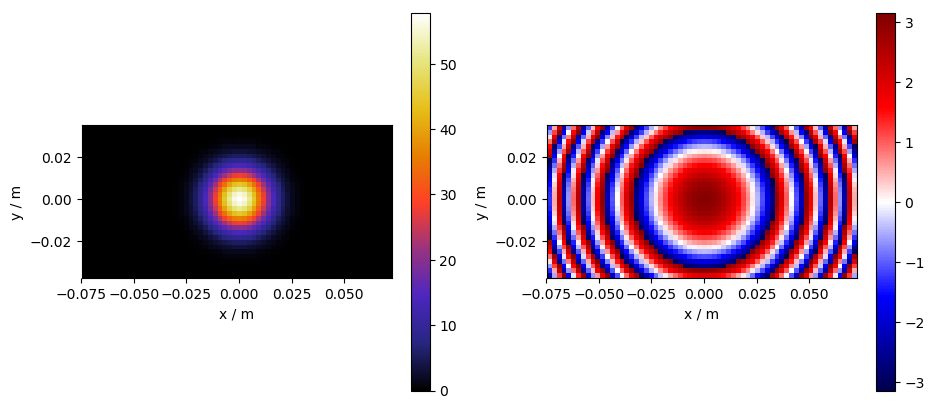

0.004684257156250001 0.004684257156250001
(64, 32)
1
(0.02184340897687911, 0.021843408976748586)
(0.02184340898128528, 0.021843408983310334)


In [6]:
far = gbw.FarFieldProp(1.0)
print(far.dx, far.dy)
print(far.shape())
print("%g"%far.TotalPower())
print(far.FitSizeW(order=4, threshold=-3))
print(far.RMS_SizeW())
far.plot()
plt.show()

far = gbw.FarFieldProp(2.0)
print(far.dx, far.dy)
print(far.shape())
print("%g"%far.TotalPower())
print(far.FitSizeW(order=4, threshold=-3))
print(far.RMS_SizeW())

In [7]:
gb = SingleComponentBeam.GaussianBeamWaist(f, 128, 64, 0.001, 0.002, w0, w0)
nf = gb.NearFieldProp(1.0)
print(nf.TotalPower())
print(nf.FitSizeW())
ff = gb.FarFieldProp(1.0)
print(ff.TotalPower())
print(ff.FitSizeW())
nf = gb.NearFieldProp(2.0)
print(nf.TotalPower())
print(nf.FitSizeW())
ff = gb.FarFieldProp(2.0)
print(ff.TotalPower())
print(ff.FitSizeW())


λ = 0.299792 mm
k = 20958.450220 m⁻¹
1.0000000000000002
(0.013814984847910468, 0.013814984847919005)
1.0000000000000004
(0.013814984847890434, 0.013814984847890482)
1.0000000000000002
(0.02184340904912448, 0.021843408731028753)
1.0000000000000002
(0.021843408976876214, 0.021843408976876155)


In [8]:
gb = SingleComponentBeam.GaussianBeamWaist(f, 64, 64, 0.002, 0.002, w0, w0)
nf = gb.NearFieldProp(1.0)
print(nf.TotalPower())
print(nf.FitSizeW())
ff = gb.FarFieldProp(1.0)
print(ff.TotalPower())
print(ff.FitSizeW())
nf = gb.NearFieldProp(2.0)
print(nf.TotalPower())
print(nf.FitSizeW())
ff = gb.FarFieldProp(2.0)
print(ff.TotalPower())
print(ff.FitSizeW())


λ = 0.299792 mm
k = 20958.450220 m⁻¹
1.0000000000000002
(0.01381498484793543, 0.013814984847935403)
1.0000000000000004
(0.013814984847890434, 0.013814984847890484)
1.0000000000000002
(0.021843408734234473, 0.02184340873423414)
1.0000000000000002
(0.021843408976876203, 0.02184340897687615)


In [9]:
gb = SingleComponentBeam.GaussianBeamWaist(f, 128, 128, 0.002, 0.002, w0, w0)
nf = gb.NearFieldProp(1.0)
print(nf.TotalPower())
print(nf.FitSizeW())
ff = gb.FarFieldProp(1.0)
print(ff.TotalPower())
print(ff.FitSizeW())
nf = gb.NearFieldProp(2.0)
print(nf.TotalPower())
print(nf.FitSizeW())
ff = gb.FarFieldProp(2.0)
print(ff.TotalPower())
print(ff.FitSizeW())


λ = 0.299792 mm
k = 20958.450220 m⁻¹
1.0000000000000004
(0.01381498484793543, 0.013814984847935405)
dx : 0.002 => 0.001
dy : 0.002 => 0.001
1.0000000000000004
(0.013814984847903031, 0.013814984847903264)
1.0
(0.021843408976695365, 0.02184340897669537)
1.0000000000000002
(0.02184340897674412, 0.02184340897674418)


λ = 0.299792 mm
k = 20958.450220 m⁻¹


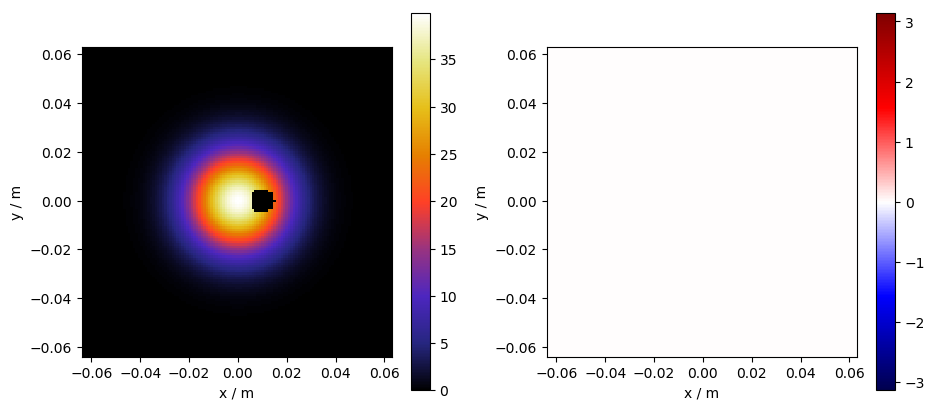

In [9]:
w0=0.02
hb = SingleComponentBeam.GaussianBeamWaist(f, 128, 128, 0.001, 0.001, w0, w0)

R=0.005
for ix in range(hb.nx):
    for iy in range(hb.ny):
        if pow(hb.x(ix)-0.01,2)+pow(hb.y(iy),2)<pow(R,2):
            hb.A[ix][iy] = 0.0

hb.plot()
plt.show()

0.9286904640283841


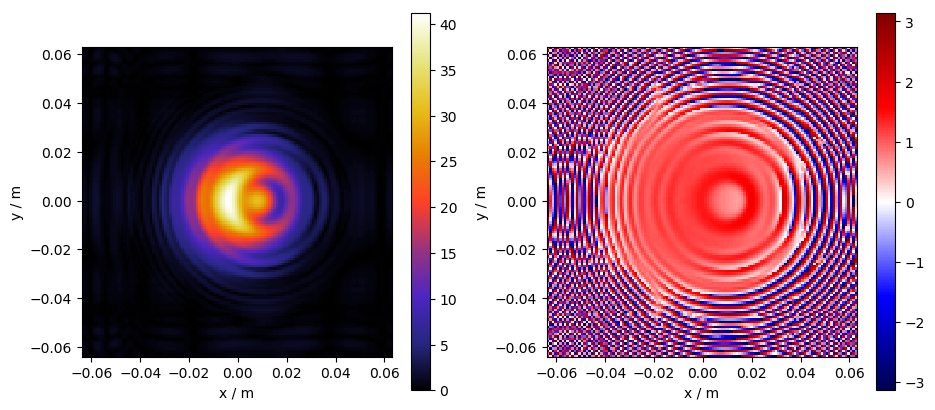

In [11]:
p = hb.NearFieldProp(0.5)
print(p.TotalPower())
p.plot()
plt.show()

0.9286904640283845


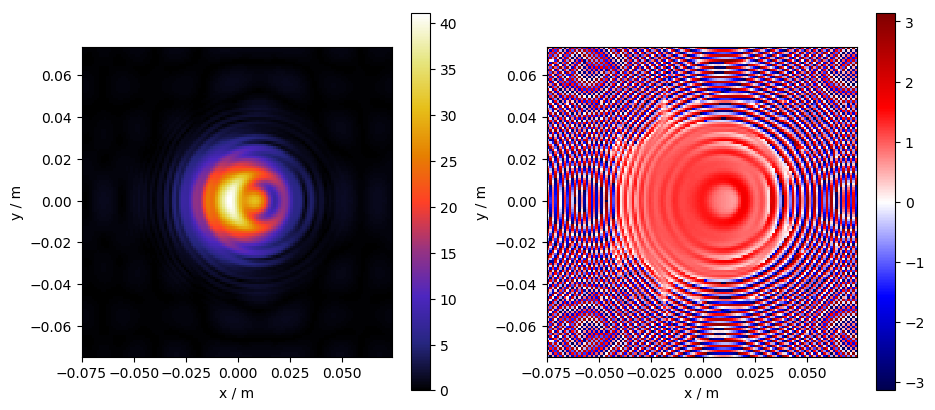

In [10]:
p = hb.FarFieldProp(0.5)
print(p.TotalPower())
p.plot()
plt.show()

(64, 32)


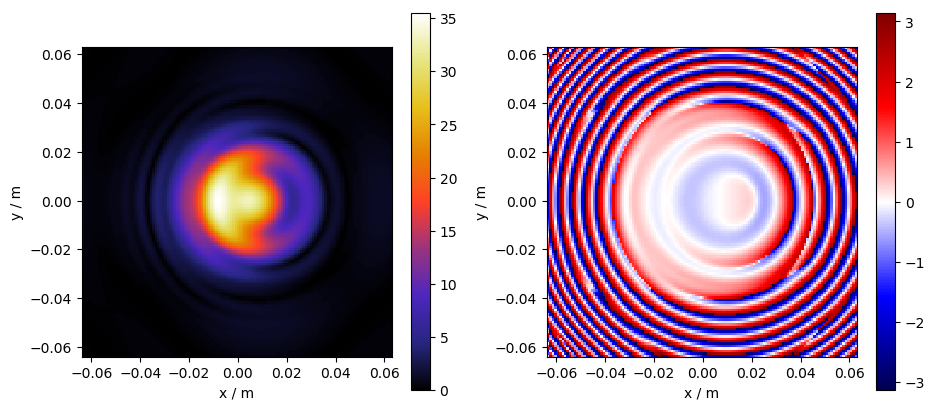

In [28]:
hft = copy.deepcopy(hb)
# warning - takes quite some time
# HuygensFresnel(hb,hft,1.0)
print(hft.shape())
hft.plot()
plt.show()

λ = 0.299792 mm
k = 20958.450220 m⁻¹
w0 = 9.768669 mm
w = 13.814985 mm
R = 2.000000 m
1.0000000000000002


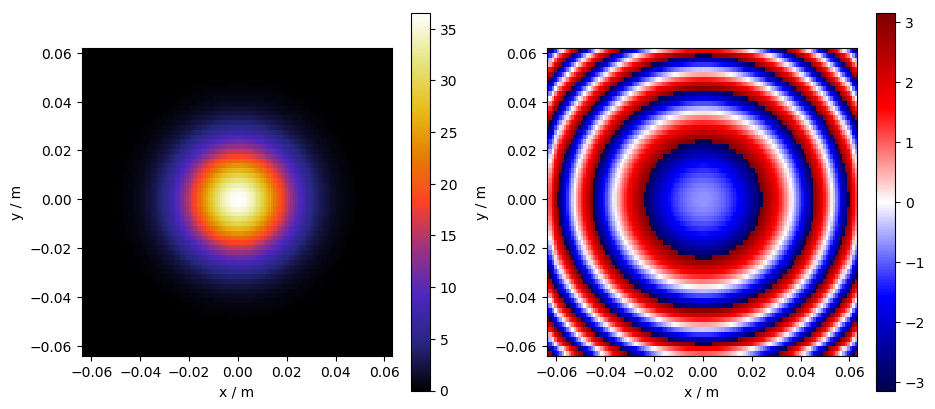

In [12]:
gb = SingleComponentBeam.GaussianBeam(f, 128, 64, 0.001, 0.002, zR, 1.0)
p3 = gb.NearFieldProp(1.0)
print(p3.TotalPower())
p3.plot()
plt.show()

1.0000000000000002


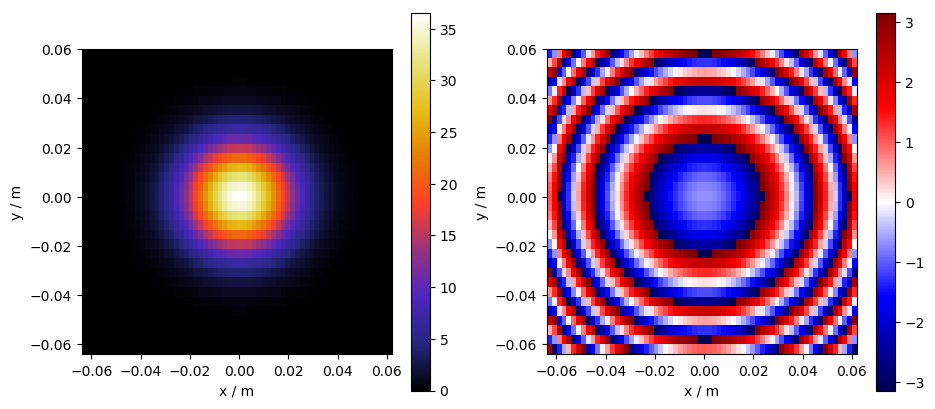

In [13]:
p4 = gbw.NearFieldProp(2.0)
print(p4.TotalPower())
p4.plot()
plt.show()

λ = 0.299792 mm
k = 20958.450220 m⁻¹
w0 = 9.768669 mm
w = 13.814985 mm
R = 2.000000 m
0.9999999999999998
(0.00976866946757963, 0.00976866946710372)
(0.00976866946849647, 0.009768669468496253)


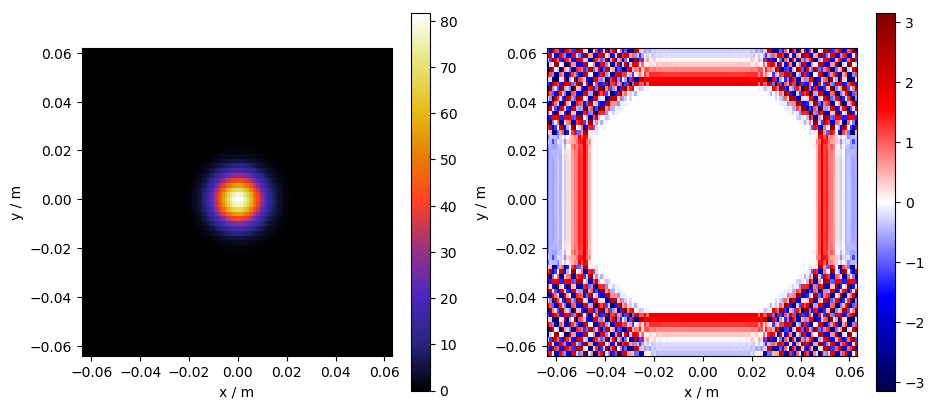

In [7]:
gb = SingleComponentBeam.GaussianBeam(f, 128, 64, 0.001, 0.002, zR, 1.0)
nf = gb.NearFieldProp(-1.0)
print(nf.TotalPower())
print(nf.FitSizeW())
print(nf.RMS_SizeW())
nf.plot()
plt.show()

1.0
(0.009768669467245134, 0.009768669467308071)
(0.009768669468496471, 0.009768669468496253)


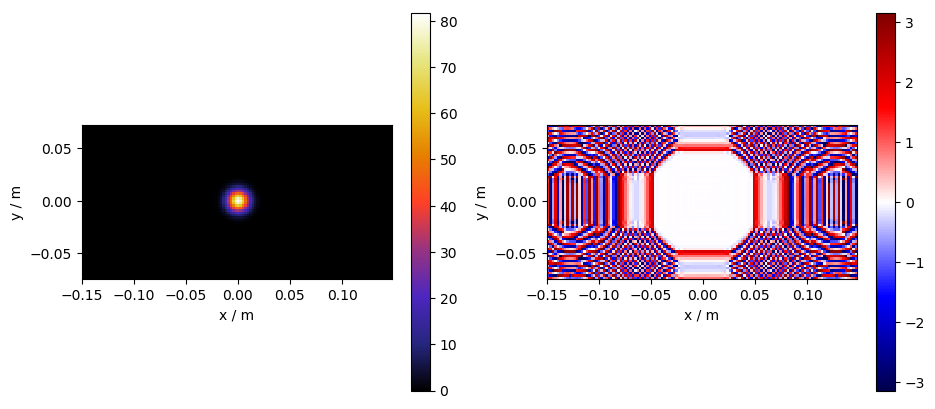

In [8]:
ff = SingleComponentBeam.FarFieldProp(gb,-1.0)
print(ff.TotalPower())
print(ff.FitSizeW())
print(ff.RMS_SizeW())
ff.plot()
plt.show()